In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Stroke Prediction 🫀


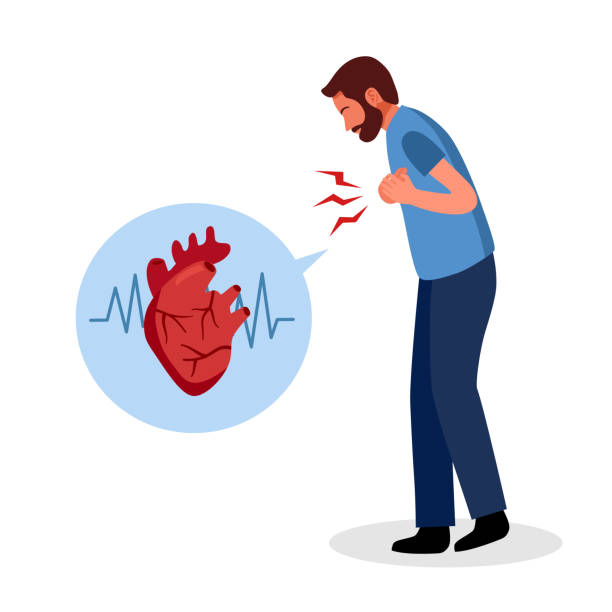

## Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataset


In [ ]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Preprocessing


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


### Filling the missing values

In [ ]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df.isna().sum()

<ipython-input-9-fb1c7b421036>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


## Dropping the duplicates

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(5110, 12)

In [ ]:
# Drop the 'id' column
df = df.drop('id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


# Exploratory Data Analysis (EDA)

## Histograms

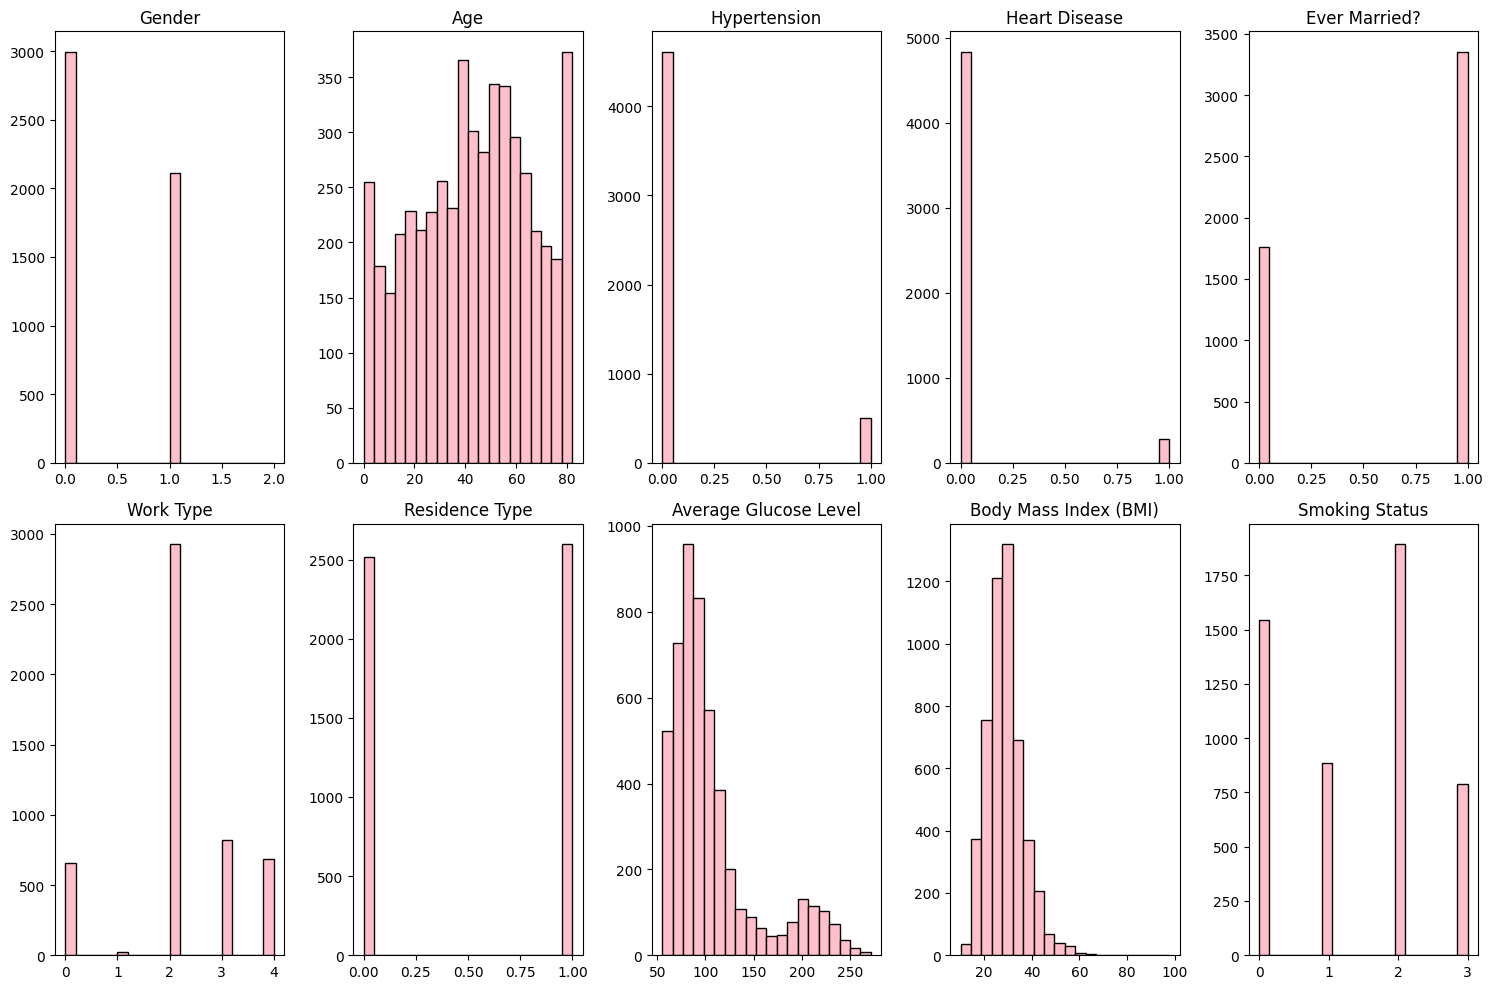

In [ ]:
# Histograms
plt.figure(figsize=(15, 10))

plt.subplot(2, 5, 1)
plt.hist(df['gender'], bins=20, color='pink', edgecolor='black')
plt.title('Gender')

plt.subplot(2, 5, 2)
plt.hist(df['age'], bins=20, color='pink', edgecolor='black')
plt.title('Age')

plt.subplot(2, 5, 3)
plt.hist(df['hypertension'], bins=20, color='pink', edgecolor='black')
plt.title('Hypertension')

plt.subplot(2, 5, 4)
plt.hist(df['heart_disease'], bins=20, color='pink', edgecolor='black')
plt.title('Heart Disease')

plt.subplot(2, 5, 5)
plt.hist(df['ever_married'], bins=20, color='pink', edgecolor='black')
plt.title('Ever Married?')

plt.subplot(2, 5, 6)
plt.hist(df['work_type'], bins=20, color='pink', edgecolor='black')
plt.title('Work Type')

plt.subplot(2, 5, 7)
plt.hist(df['Residence_type'], bins=20, color='pink', edgecolor='black')
plt.title('Residence Type')

plt.subplot(2, 5, 8)
plt.hist(df['avg_glucose_level'], bins=20, color='pink', edgecolor='black')
plt.title('Average Glucose Level')

plt.subplot(2, 5, 9)
plt.hist(df['bmi'], bins=20, color='pink', edgecolor='black')
plt.title('Body Mass Index (BMI)')

plt.subplot(2, 5, 10)
plt.hist(df['smoking_status'], bins=20, color='pink', edgecolor='black')
plt.title('Smoking Status')

plt.tight_layout()
plt.show()

## Box Plots

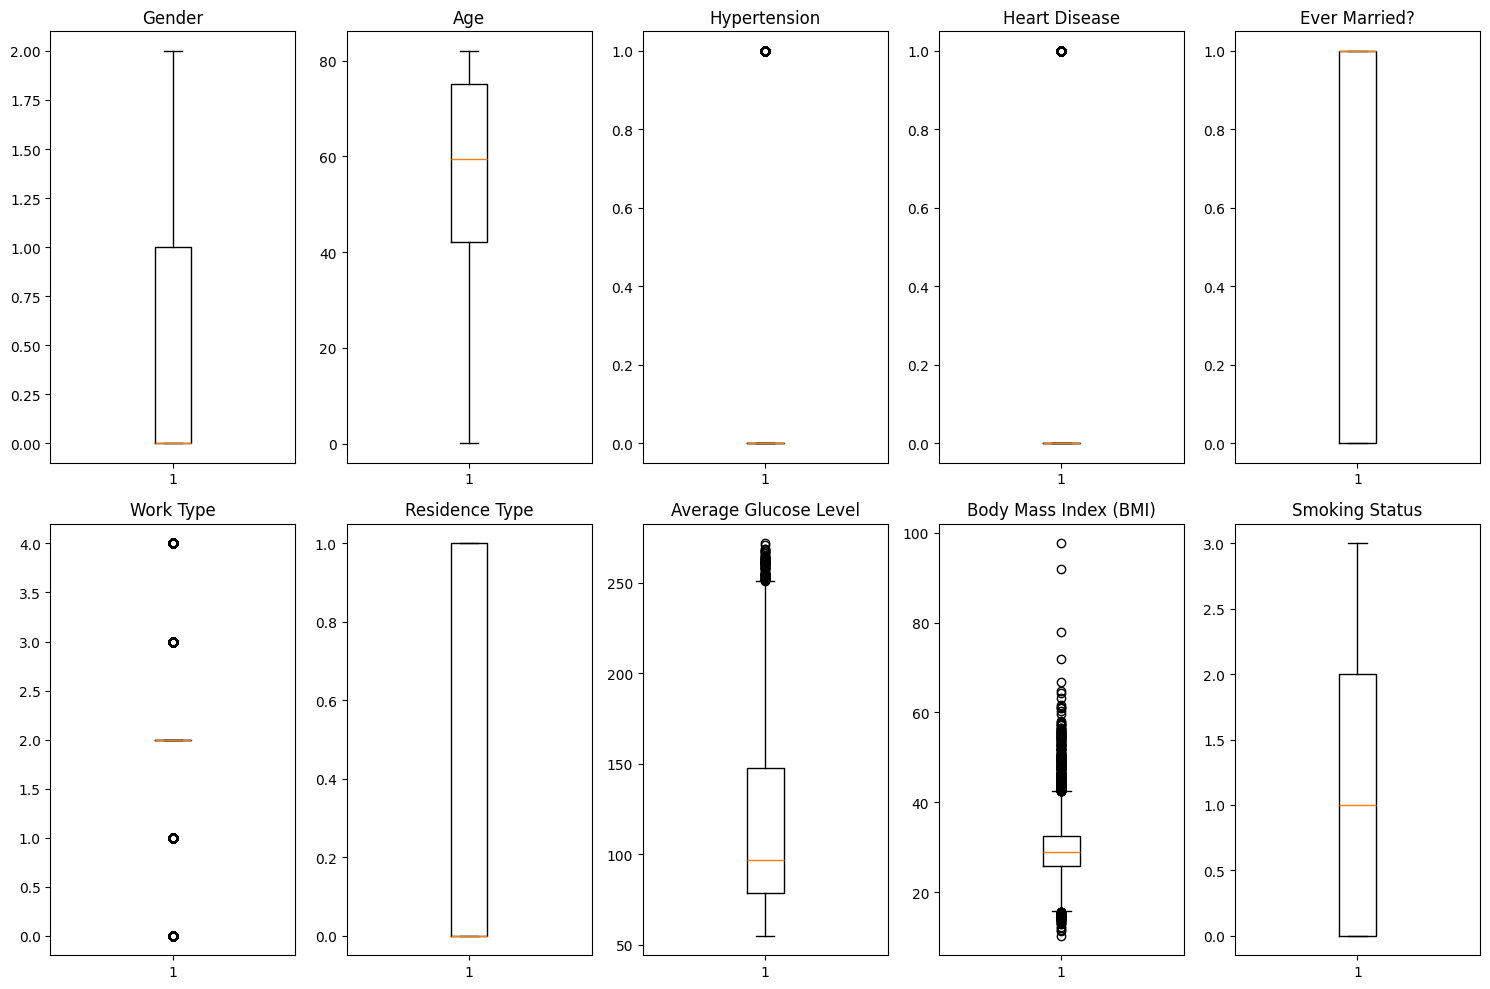

In [ ]:
# Box plots
plt.figure(figsize=(15, 10))

plt.subplot(2, 5, 1)
plt.boxplot(df['gender'])
plt.title('Gender')

plt.subplot(2, 5, 2)
plt.boxplot(df['age'])
plt.title('Age')

plt.subplot(2, 5, 3)
plt.boxplot(df['hypertension'])
plt.title('Hypertension')

plt.subplot(2, 5, 4)
plt.boxplot(df['heart_disease'])
plt.title('Heart Disease')

plt.subplot(2, 5, 5)
plt.boxplot(df['ever_married'])
plt.title('Ever Married?')

plt.subplot(2, 5, 6)
plt.boxplot(df['work_type'])
plt.title('Work Type')

plt.subplot(2, 5, 7)
plt.boxplot(df['Residence_type'])
plt.title('Residence Type')

plt.subplot(2, 5, 8)
plt.boxplot(df['avg_glucose_level'])
plt.title('Average Glucose Level')

plt.subplot(2, 5, 9)
plt.boxplot(df['bmi'])
plt.title('Body Mass Index (BMI)')

plt.subplot(2, 5, 10)
plt.boxplot(df['smoking_status'])
plt.title('Smoking Status')

plt.tight_layout()
plt.show()


# Class Imbalance Analysis

stroke
0    4861
1     249
Name: count, dtype: int64


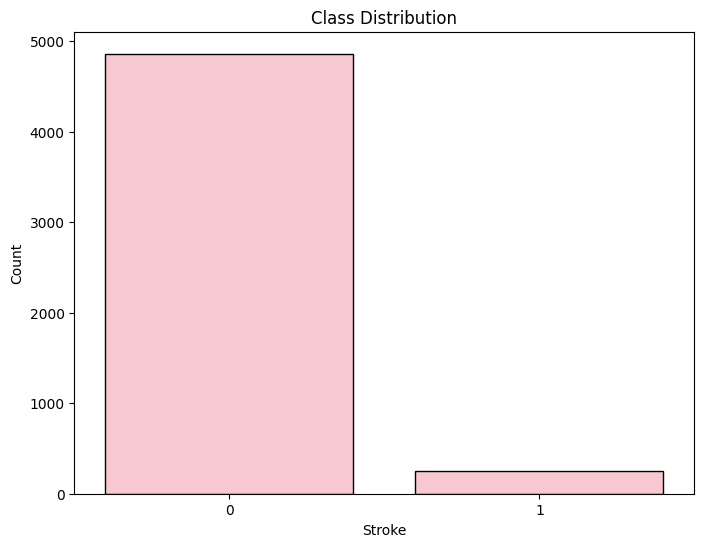

stroke
0    95.127202
1     4.872798
Name: count, dtype: float64
Class imbalance detected. Consider resampling techniques.


In [ ]:
# Class Imbalance Analysis
class_counts = df['stroke'].value_counts()
print(class_counts)

# Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x='stroke', data=df, color='pink', edgecolor='black')
plt.title('Class Distribution')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

# Calculate the percentage of each class
class_percentages = (class_counts / len(df)) * 100
print(class_percentages)

# To determine if class balancing is needed
if class_percentages.min() < 20:
    print("Class imbalance detected. Consider resampling techniques.")
else:
    print("Class imbalance not significant enough to use resampling techniques.")

## SMOTE technique

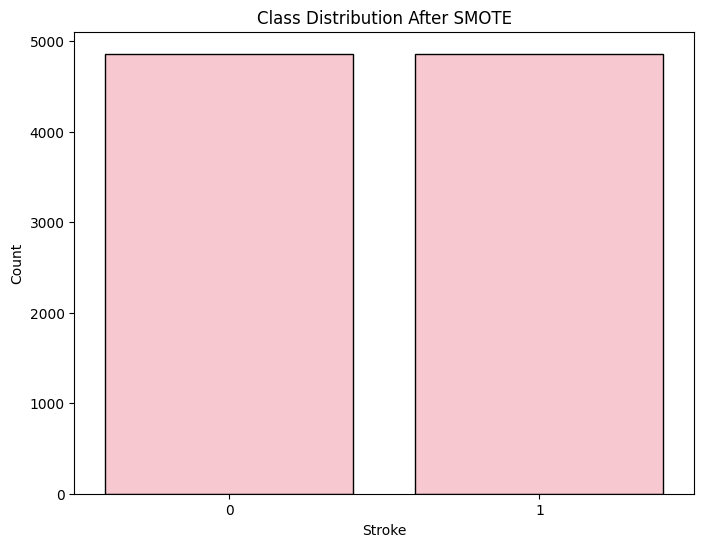

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Update the original DataFrame with the resampled data
df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['stroke'])], axis=1)

# Display the class distribution after SMOTE using a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='stroke', data=df, color='pink', edgecolor='black')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

In [ ]:
df.stroke.value_counts()

,count
stroke,
1,4861
0,4861


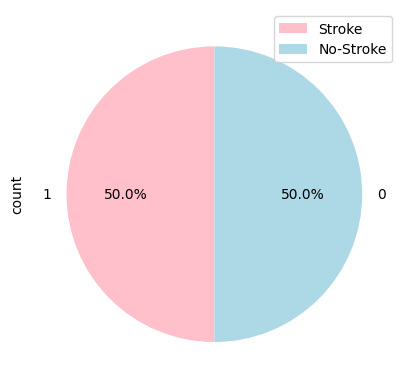

In [ ]:
df['stroke'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['Pink', 'lightblue'])
plt.legend(['Stroke', 'No-Stroke'])
plt.show()

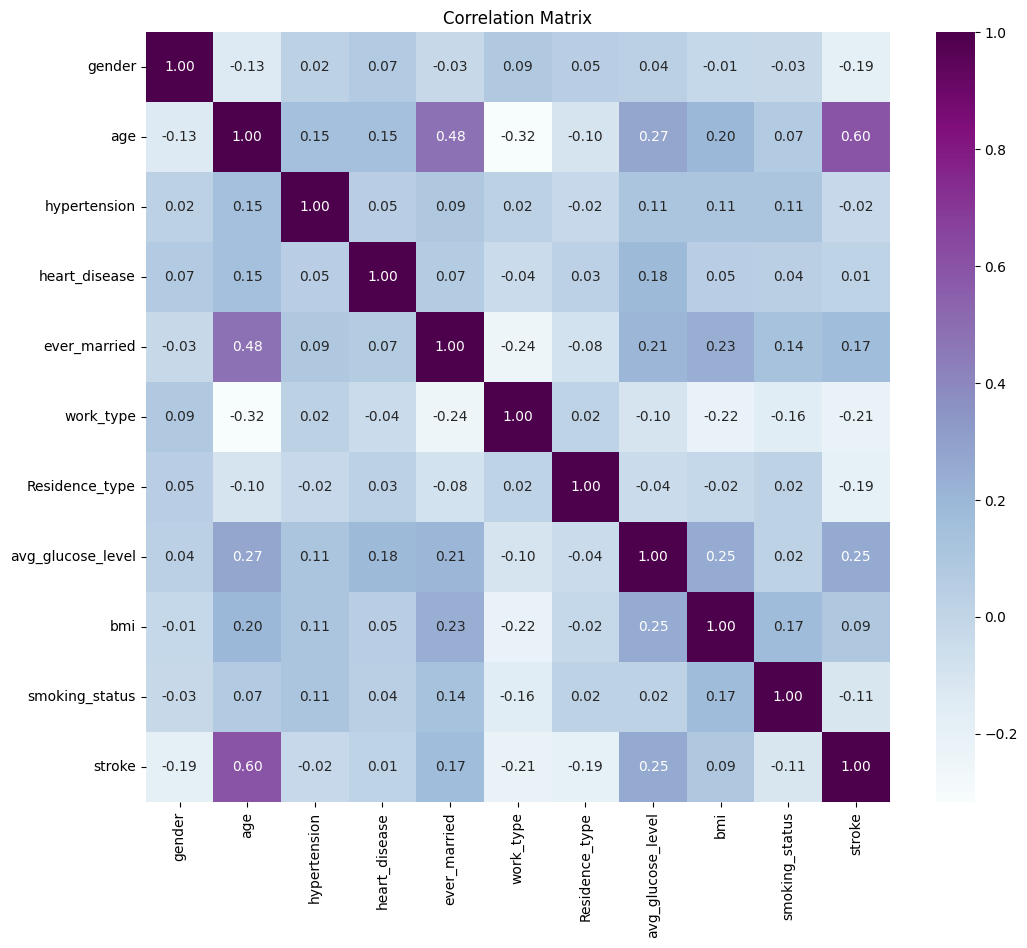

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Decision Tree Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)  # You can customize parameters here
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8982005141388175


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       975
           1       0.88      0.93      0.90       970

    accuracy                           0.90      1945
   macro avg       0.90      0.90      0.90      1945
weighted avg       0.90      0.90      0.90      1945



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
cm

Confusion Matrix:


array([[847, 128],
       [ 70, 900]])

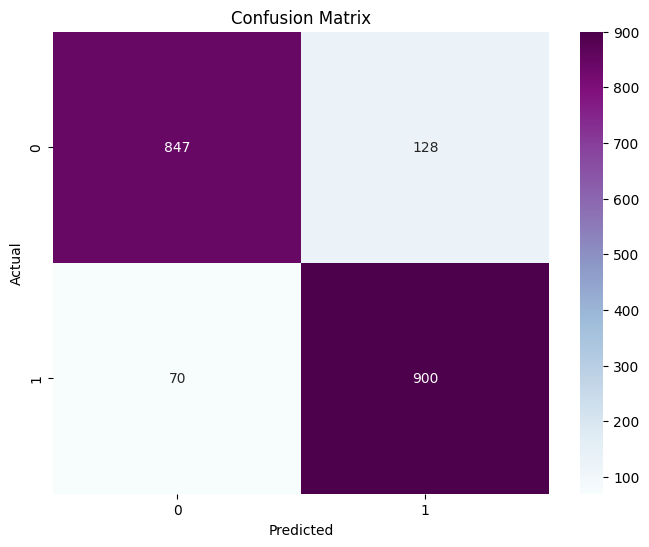

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

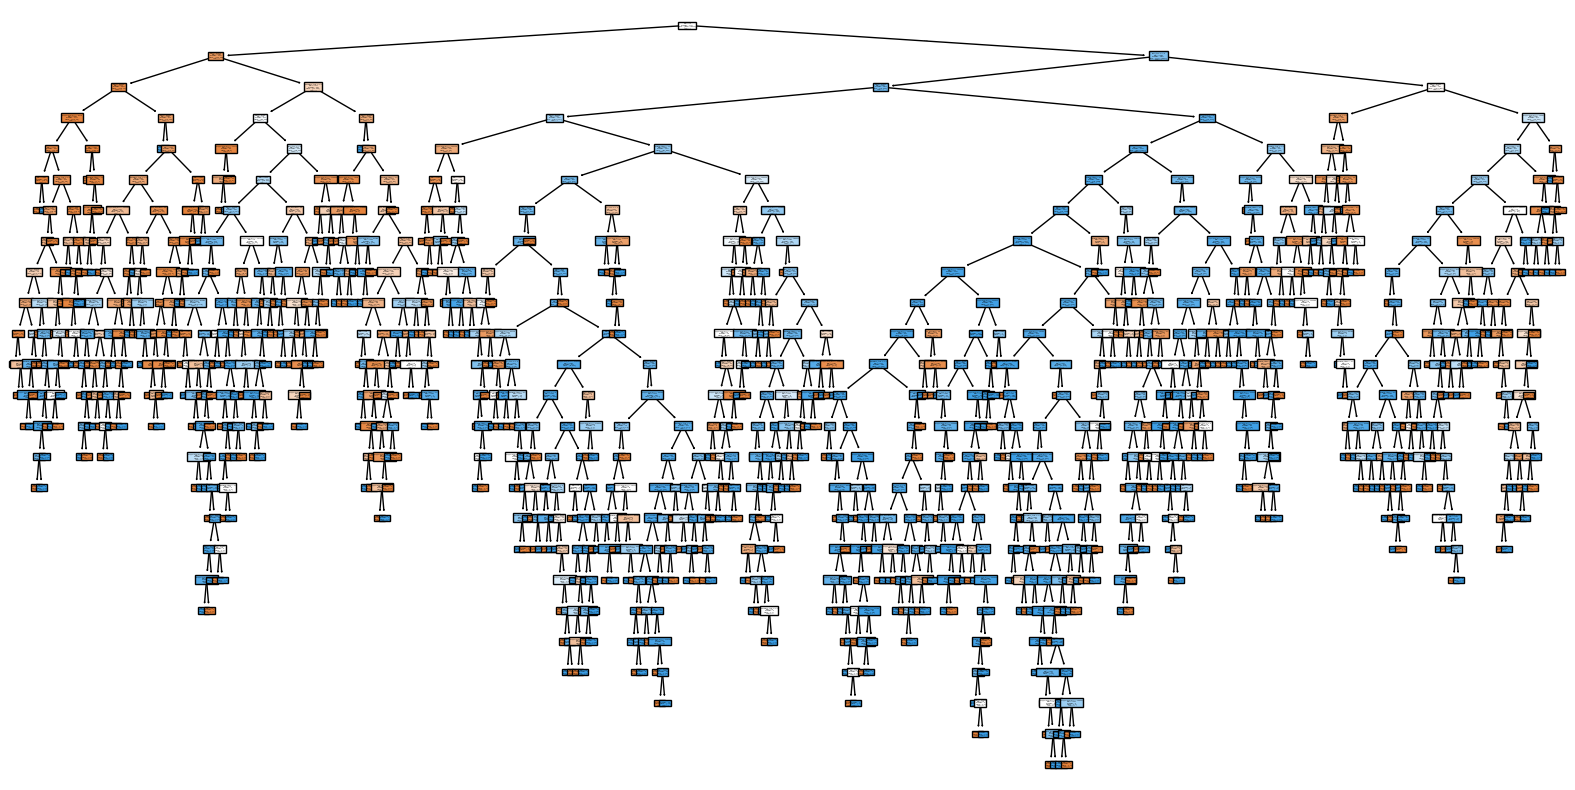

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, feature_names=X.columns, class_names=['0','1'], filled=True)
plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9491002570694087


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       975
           1       0.94      0.96      0.95       970

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[910  65]
 [ 34 936]]


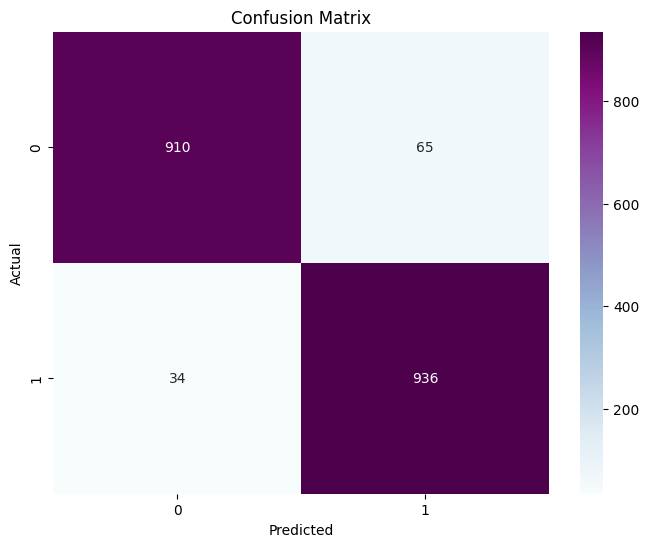

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(random_state=42)

svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.770694087403599


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       975
           1       0.74      0.83      0.78       970

    accuracy                           0.77      1945
   macro avg       0.77      0.77      0.77      1945
weighted avg       0.77      0.77      0.77      1945



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[693 282]
 [164 806]]


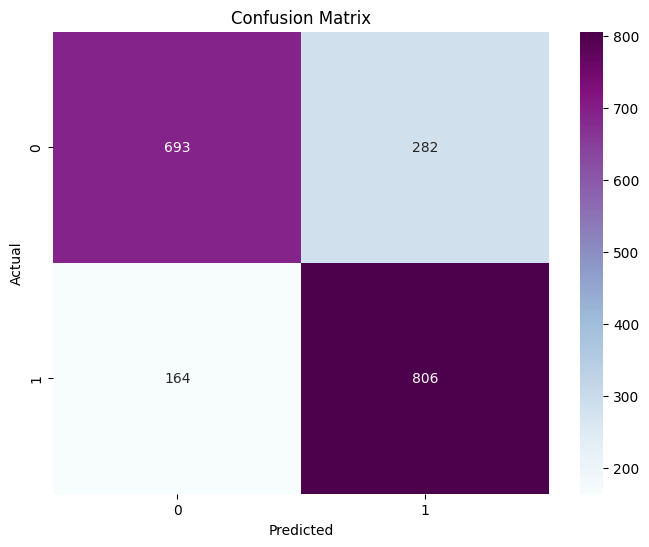

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
y_pred = logreg_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8041131105398458


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       975
           1       0.79      0.83      0.81       970

    accuracy                           0.80      1945
   macro avg       0.81      0.80      0.80      1945
weighted avg       0.81      0.80      0.80      1945



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[755 220]
 [161 809]]


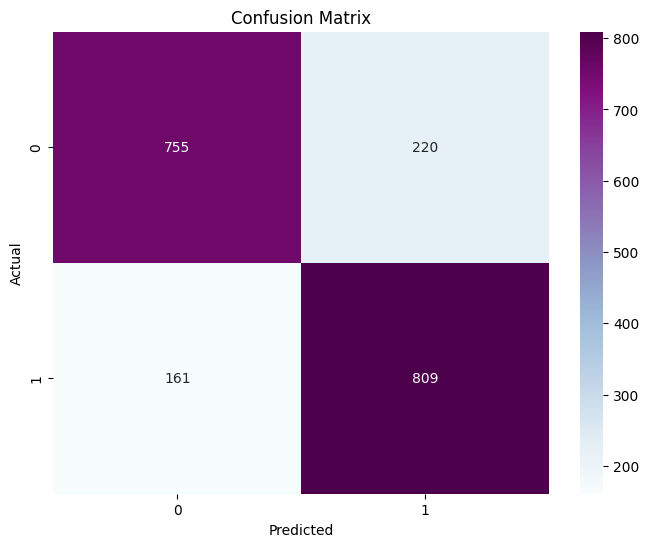

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Comparing all four models

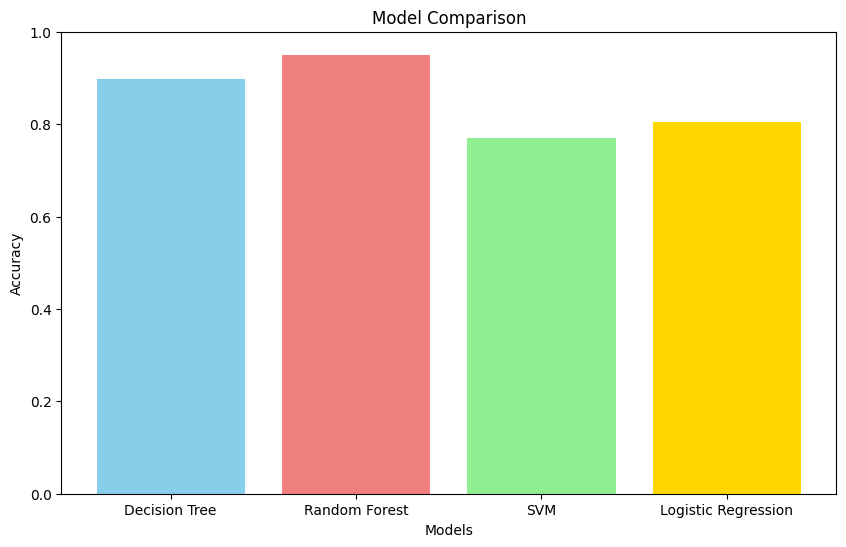

In [ ]:
model_names = ['Decision Tree', 'Random Forest', 'SVM', 'Logistic Regression']
accuracies = [accuracy_score(y_test, dt_classifier.predict(X_test)),
              accuracy_score(y_test, rf_classifier.predict(X_test)),
              accuracy_score(y_test, svm_classifier.predict(X_test)),
              accuracy_score(y_test, logreg_classifier.predict(X_test))]

colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=colors)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0, 1)
plt.show()

# Best Model

In [ ]:
best_model_index = np.argmax(accuracies)
best_model_name = model_names[best_model_index]
best_accuracy = accuracies[best_model_index]

print(f"The best model is {best_model_name} with an accuracy of {best_accuracy}")

The best model is Random Forest with an accuracy of 0.9491002570694087
